In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    
    def __init__(self,k=2):
        self.k = k

    def dist(self,x,y):
        return np.sqrt((x-y)**2)

    def plot_cluster(self,result):
        colour = ['b','g','r','c','m','y','k','w']
        for i in range(result.shape[0]):
            plt.plot(i,result[:,0][i],'.',color=colour[result[:,1].astype(int)[i]])
            
    def fit(self,points,plot=True):
        not_converged = True
        centroids = np.random.normal(np.mean(points),1,(self.k,))
        assignment = np.array([0])
        while not_converged:
            
            new_assignment = np.array([])
            for near in range(len(points)):

                nearest = np.where(self.dist(points[near],centroids) == np.min(self.dist(points[near],centroids)))[0][0]
                new_assignment = np.append(new_assignment,nearest)
                
            if (new_assignment==assignment).all():
                not_converged = False
            assignment = new_assignment

            new_cent = np.array([])
            for cent in range(self.k):     
                new_cent = np.append(new_cent,np.mean(points[np.where(assignment == cent)[0]]))
            centroids = new_cent
        result =  np.concatenate((np.atleast_2d(points),np.atleast_2d(assignment))).T

        if plot:
            self.plot_cluster(result)

        return result

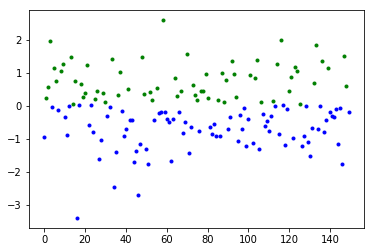

In [3]:
k = 2
points = np.random.normal(0,1,(150,))
kmeans = KMeans(k)
result = kmeans.fit(points,plot=True)


